# Orientation Analysis

In [19]:
import numpy
import gsd
import gsd.hoomd
from matplotlib import pyplot

In [20]:
# To show orientations, we use arrows rotated by the quaternions.
from mpl_toolkits.mplot3d.axes3d import Axes3D

# These functions are adapted from the rowan quaternion library.
# See rowan.readthedocs.io for more information.
def quat_multiply(qi, qj):
    """Multiply two sets of quaternions."""
    output = numpy.empty(numpy.broadcast(qi, qj).shape)

    output[..., 0] = qi[..., 0] * qj[..., 0] - \
        numpy.sum(qi[..., 1:] * qj[..., 1:], axis=-1)
    output[..., 1:] = (qi[..., 0, numpy.newaxis] * qj[..., 1:] +
                       qj[..., 0, numpy.newaxis] * qi[..., 1:] +
                       numpy.cross(qi[..., 1:], qj[..., 1:]))
    return output

def quat_rotate(q, v):
    """Rotate a vector by a quaternion."""
    v = numpy.array([0, *v])
    
    q_conj = q.copy()
    q_conj[..., 1:] *= -1
    
    return quat_multiply(q, quat_multiply(v, q_conj))[..., 1:]

### Simulation 1, run 1

In [21]:
t1 = gsd.hoomd.open('binary_mixture_sim1.gsd', 'rb')

In [22]:
def orientationPlot(step, t):
    L = t[0].particles.N
    positions = t[step].particles.position[0:L];
    
    orientations = t[step].particles.orientation[0:L]
    arrowheads = quat_rotate(orientations, numpy.array([1, 0, 0]))

    fig = pyplot.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver3D(positions[:, 0], positions[:, 1], positions[:, 2],
                arrowheads[:, 0], arrowheads[:, 1], arrowheads[:, 2])
    ax.set_title("Orientations", fontsize=16);

In [23]:
def nematicOrderTensor(step, t):
 
    L = t[0].particles.N
    quaternions = t[step].particles.orientation[0:L]
    arrowheads = quat_rotate(quaternions, numpy.array([1, 0, 0]))
    
    
    results = []
    for i in range(5):
        results.append( numpy.outer(arrowheads[i],arrowheads[i])  )
        
    Q = numpy.mean(results, axis=0)  # calculate mean without flattening array
    Q -= numpy.identity(3)/3.0       # subtract Identity/3
    
    return(Q)

In [24]:
nematicOrderTensor(0,t1)

array([[ 0.66666667,  0.        ,  0.        ],
       [ 0.        , -0.33333333,  0.        ],
       [ 0.        ,  0.        , -0.33333333]])

In [25]:
def nematization(step, t):
        Q = nematicOrderTensor(step,t)
        
        eigen_values, eigen_vectors = numpy.linalg.eig(Q)
        idx = eigen_values.argsort()[::-1]   
        
        eigen_values = eigen_values[idx]
       
        return(1.5*eigen_values[0])

In [26]:
nematization(9,t1)

0.814237372755531

In [27]:
def sList(t):

    s = []
    for i in range(len(t)):
        s.append(nematization(i,t))
        
    return(s)

(0, 1.1)

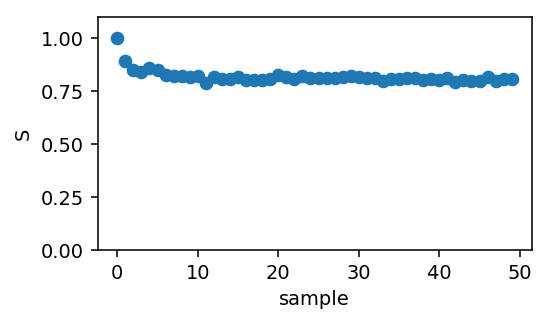

In [28]:
pyplot.figure(figsize=(4,2.2), dpi=140);

s1= sList(t1)

pyplot.scatter(
    numpy.arange(len(s1)), 
    s1);

pyplot.xlabel('sample');
pyplot.ylabel('S');
pyplot.ylim((0,1.1))

### Simulation 1, run 2

In [29]:
t2 = gsd.hoomd.open('binary_mixture_sim1_run2.gsd', 'rb')

In [30]:
nematization(9,t2)

0.814237372755531

(0, 1.1)

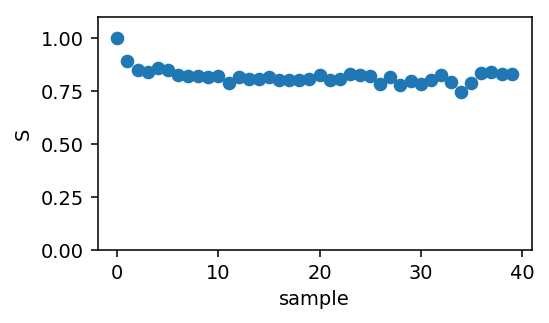

In [31]:
pyplot.figure(figsize=(4,2.2), dpi=140);

s1= sList(t2)

pyplot.scatter(
    numpy.arange(len(s1)), 
    s1);

pyplot.xlabel('sample');
pyplot.ylabel('S');
pyplot.ylim((0,1.1))

### Simulation 2, run 1

In [35]:
t3 = gsd.hoomd.open('binary_mixture_sim2_run1.gsd', 'rb')

In [36]:
nematization(9,t3)

0.9701846080586882

(0, 1.1)

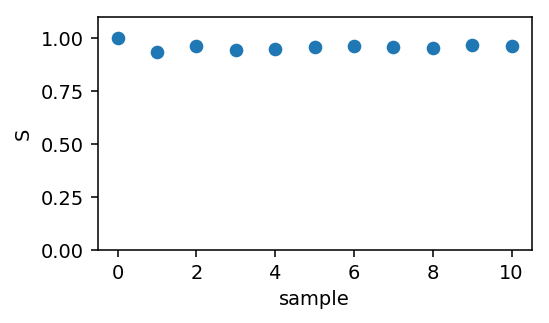

In [37]:
pyplot.figure(figsize=(4,2.2), dpi=140);

s1= sList(t3)

pyplot.scatter(
    numpy.arange(len(s1)), 
    s1);

pyplot.xlabel('sample');
pyplot.ylabel('S');
pyplot.ylim((0,1.1))

### Simulation 2, run 2

In [40]:
t4 = gsd.hoomd.open('binary_mixture_sim2_run2.gsd', 'rb')

In [41]:
nematization(9,t3)

0.9701846080586882

(0, 1.1)

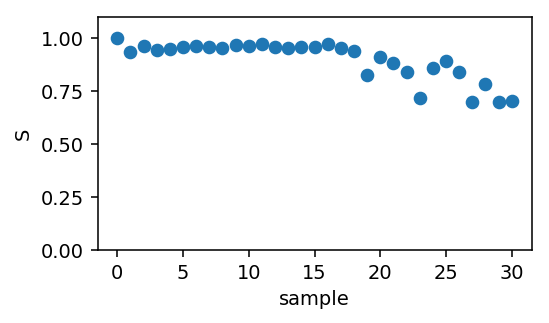

In [42]:
pyplot.figure(figsize=(4,2.2), dpi=140);

s1= sList(t4)

pyplot.scatter(
    numpy.arange(len(s1)), 
    s1);

pyplot.xlabel('sample');
pyplot.ylabel('S');
pyplot.ylim((0,1.1))

### Simulation 2, run 3

In [43]:
t5 = gsd.hoomd.open('binary_mixture_sim2_run3.gsd', 'rb')

In [44]:
nematization(9,t5)

0.9701846080586882

(0, 1.1)

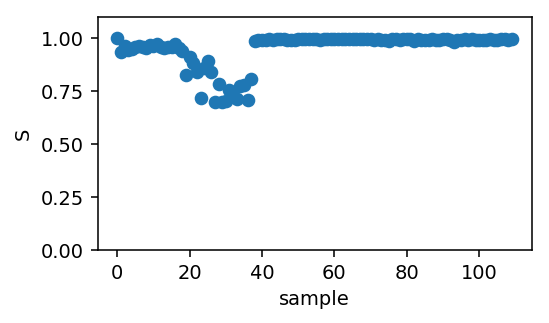

In [45]:
pyplot.figure(figsize=(4,2.2), dpi=140);

s1= sList(t5)

pyplot.scatter(
    numpy.arange(len(s1)), 
    s1);

pyplot.xlabel('sample');
pyplot.ylabel('S');
pyplot.ylim((0,1.1))